In [98]:
import pandas as pd
import urllib.parse
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [99]:
start = '2020-01-01'
end = None

In [100]:
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'kind.krx.co.kr/corpgeneral/corpList.do'

def download_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]

    if not delisted:
        params['searchType'] = 13

    params_string = urllib.parse.urlencode(params)
    request_url = urllib.parse.urlunsplit(['http', DOWNLOAD_URL, '', params_string, ''])

    df = pd.read_html(request_url, header=0)[0]
    df.종목코드 = df.종목코드.map('{:06d}'.format)

    return df

In [101]:
kospi_stocks = download_stock_codes('kospi')
#kospi_stocks.head()
ks=kospi_stocks[['회사명','종목코드']]
ks = ks.rename(columns={'회사명':'name', '종목코드':'code'})

In [102]:
from pandas import Series, DataFrame
ks200 = pd.read_csv('/Users/keom/Desktop/FBA/Portfolio Optimization/KS_2001.csv')
pd.DataFrame(ks200)
ks200 = ks200.rename(columns={'회사명':'name', '종목코드':'code'})
ks200

,name,code
0,삼성전자,5930
1,SK하이닉스,660
2,삼성바이오로직스,207940
3,NAVER,35420
4,셀트리온,68270
...,...,...
195,AK홀딩스,6840
196,남양유업,3920
197,쌍용차,3620
198,현대리바트,12830


In [103]:
ks200['code'] = pd.DataFrame(ks200['code'])
ks200

,name,code
0,삼성전자,5930
1,SK하이닉스,660
2,삼성바이오로직스,207940
3,NAVER,35420
4,셀트리온,68270
...,...,...
195,AK홀딩스,6840
196,남양유업,3920
197,쌍용차,3620
198,현대리바트,12830


In [104]:
ks200.code = ks200.code.map('{:06d}'.format)

In [105]:
ks200['code'] = pd.DataFrame(ks200['code'])
ks200.tail(50)

,name,code
150,에스엘,005850
151,대상,001680
152,한전기술,052690
153,휴켐스,069260
154,대덕전자,008060
155,후성,093370
156,JW중외제약,001060
157,쿠쿠홀딩스,192400
158,대한유화,006650
159,SPC삼립,005610


In [106]:
from pandas_datareader import data
import datetime

In [107]:
results = {}
for code in ks200.code.head(150):
    try:
        results[code] = data.DataReader(code + '.KS', 'yahoo', start, end)
    except KeyError:
         pass
    df = pd.concat(results, axis=1)
ks150 = df.loc[:, pd.IndexSlice[:, 'Adj Close']]

In [108]:
wti = web.DataReader("WTI", "yahoo", start, end)
wti = wti['Adj Close']
wti = pd.DataFrame(wti)


In [109]:
ret_ks = pd.DataFrame(ks150).pct_change().dropna(0)
ret_wti = pd.DataFrame(wti).pct_change().dropna(0)

In [110]:
ks_wti = ret_wti[["Adj Close"]].merge(ret_ks,
                                           left_on='Date',
                                           right_on='Date',
                                           how='left')
ks_wti = ks_wti.rename(columns={'Adj Close':'WTI'})
ks_wti = ks_wti.dropna()
ks_wti.head()

/opt/anaconda3/envs/quant/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,WTI,"(005930, Adj Close)","(000660, Adj Close)","(207940, Adj Close)","(035420, Adj Close)","(068270, Adj Close)","(051910, Adj Close)","(005380, Adj Close)","(051900, Adj Close)","(006400, Adj Close)",...,"(120110, Adj Close)","(005300, Adj Close)","(010780, Adj Close)","(057050, Adj Close)","(005440, Adj Close)","(170900, Adj Close)","(007570, Adj Close)","(049770, Adj Close)","(000150, Adj Close)","(018250, Adj Close)"
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.070111,0.005435,-0.002112,-0.015169,-0.005479,-0.013889,-0.009554,-0.016949,-0.002370,-0.012931,...,-0.004044,0.003663,-0.012195,0.010025,-0.008584,-0.021552,-0.008753,-0.004474,-0.008708,0.003407
2020-01-06,-0.008621,0.000000,-0.002116,-0.023697,-0.005510,-0.025352,-0.012862,0.000000,-0.011085,0.004367,...,-0.037563,-0.014599,-0.032407,-0.028536,-0.021645,-0.017621,-0.035320,-0.020225,-0.024890,-0.028862
2020-01-07,0.010435,0.005405,-0.003181,0.016990,0.036011,0.028902,0.013029,-0.004310,0.075260,0.006522,...,0.011603,0.007407,-0.003190,0.010217,-0.008850,0.000000,0.006865,0.009174,-0.004505,0.073427
2020-01-08,-0.075732,0.017921,0.036170,-0.025060,-0.021390,-0.028090,-0.028939,-0.030303,0.001489,-0.010799,...,-0.062565,-0.025735,-0.036800,-0.030341,-0.022321,-0.031390,-0.061364,-0.002273,-0.022624,0.000000
2020-01-09,-0.014898,0.031690,0.016427,0.028152,0.016393,0.023121,0.014901,-0.004464,-0.015613,0.015284,...,0.015573,0.000000,0.006645,0.011734,0.004566,0.004630,0.033898,0.002278,0.012346,0.024430


In [111]:
corr_matrix = ks_wti.corr()
corr_WTI = corr_matrix['WTI'].sort_values(ascending=False)
corr_WTI

WTI                    1.000000
(003000, Adj Close)    0.558284
(015760, Adj Close)    0.485033
(294870, Adj Close)    0.351529
(285130, Adj Close)    0.348769
                         ...   
(032830, Adj Close)   -0.274939
(111770, Adj Close)   -0.277603
(001450, Adj Close)   -0.277695
(010140, Adj Close)   -0.357371
(161390, Adj Close)   -0.358705
Name: WTI, Length: 148, dtype: float64

In [173]:
tickers = ["003000.KS", "015760.KS"]

In [174]:
from pandas_datareader import data as pdr
import yfinance as yf

def get(tickers, startdate, enddate):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker, start = startdate, end = enddate))
    datas = map(data, tickers)
    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [226]:
all_data = get(tickers, datetime.datetime(2017, 7, 1), datetime.datetime(2018, 5, 1))
all_data.head()

High           Low          Open         Close  \
Ticker    Date                                                                 
003000.KS 2017-07-03  14252.400391  13852.799805  14252.400391  13919.400391   
          2017-07-04  14485.500000  13919.400391  13952.700195  14119.200195   
          2017-07-05  14119.200195  13952.700195  14085.900391  14085.900391   
          2017-07-06  14185.799805  13986.000000  14119.200195  14085.900391   
          2017-07-07  14052.599609  13919.400391  14019.299805  14019.299805   

                        Volume     Adj Close  
Ticker    Date                                
003000.KS 2017-07-03  195466.0  13653.217773  
          2017-07-04  429538.0  13849.196289  
          2017-07-05  150774.0  13816.534180  
          2017-07-06  122508.0  13816.534180  
          2017-07-07  135668.0  13751.207031

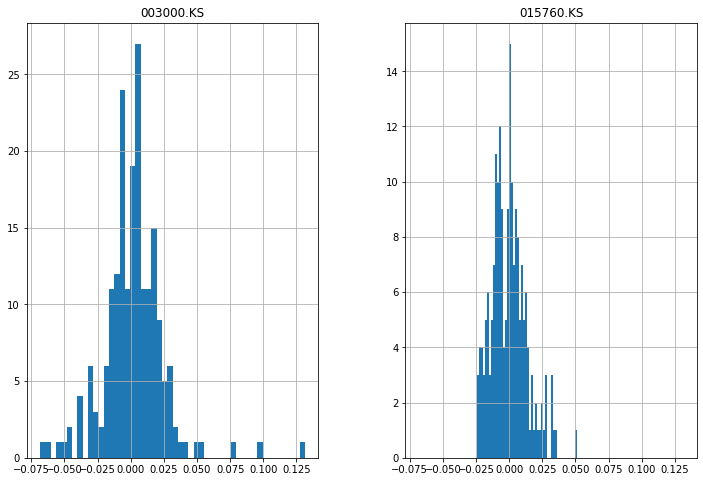

In [227]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

daily_pct_change = daily_close_px.pct_change()

daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

plt.show()

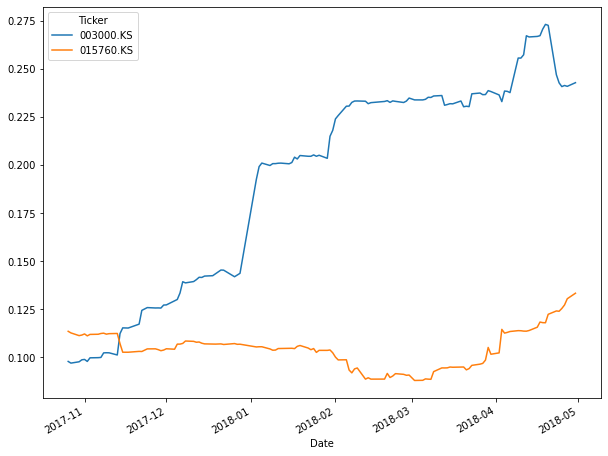

In [228]:
import numpy as np
min_periods = 75
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

vol.plot(figsize = (10, 8))

plt.show()

In [229]:
daily_close = all_data[['Close']].reset_index().pivot('Date', 'Ticker', 'Close')
daily_close

Ticker,003000.KS,015760.KS
Date,,
2017-07-03,13919.400391,40700.0
2017-07-04,14119.200195,41300.0
2017-07-05,14085.900391,42000.0
2017-07-06,14085.900391,42100.0
2017-07-07,14019.299805,42500.0
...,...,...
2018-04-24,19047.599609,36950.0
2018-04-25,19157.500000,36250.0
2018-04-26,19487.199219,35450.0


In [230]:
short_window = 2
long_window = 10

signals = pd.DataFrame(index=daily_close.index)


for ticker in tickers:
    signals['{}_signal'.format(ticker)] = 0.0
    signals["{}_short_mavg".format(ticker)] = daily_close[ticker].rolling(window = short_window, min_periods=1,center = False).mean()
    signals["{}_long_mavg".format(ticker)] = daily_close[ticker].rolling(window = long_window, min_periods=1, center = False).mean()
    signals["{}_signal".format(ticker)][short_window:] = np.where(signals['{}_short_mavg'.format(ticker)][short_window:] 
                                                                 > signals['{}_long_mavg'.format(ticker)][short_window:],
                                                                 1.0, 0.0)
    signals['{}_positions'.format(ticker)] = signals['{}_signal'.format(ticker)].diff()


In [231]:
signals

,003000.KS_signal,003000.KS_short_mavg,003000.KS_long_mavg,003000.KS_positions,015760.KS_signal,015760.KS_short_mavg,015760.KS_long_mavg,015760.KS_positions
Date,,,,,,,,
2017-07-03,0.0,13919.400391,13919.400391,NaN,0.0,40700.0,40700.000000,NaN
2017-07-04,0.0,14019.300293,14019.300293,0.0,0.0,41000.0,41000.000000,0.0
2017-07-05,1.0,14102.550293,14041.500326,1.0,1.0,41650.0,41333.333333,1.0
2017-07-06,1.0,14085.900391,14052.600342,0.0,1.0,42050.0,41525.000000,0.0
2017-07-07,1.0,14052.600098,14045.940234,0.0,1.0,42300.0,41720.000000,0.0
...,...,...,...,...,...,...,...,...
2018-04-24,0.0,18919.399414,20604.399805,0.0,1.0,36825.0,35030.000000,0.0
2018-04-25,0.0,19102.549805,20267.399805,0.0,1.0,36600.0,35210.000000,0.0
2018-04-26,0.0,19322.349609,20117.219727,0.0,1.0,35850.0,35335.000000,0.0


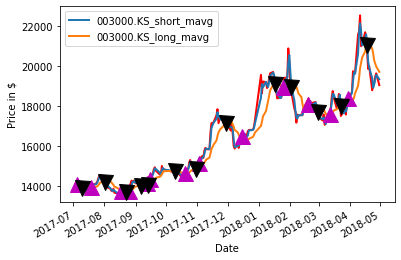

In [232]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Price in $')

daily_close['003000.KS'].plot(ax=ax1, color='r', lw=2.)

signals[['003000.KS_short_mavg', '003000.KS_long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals.loc[signals["003000.KS_positions"]==1.0].index, 
        signals["003000.KS_short_mavg"][signals["003000.KS_positions"] == 1.0],
        '^', markersize=15, color='m')
ax1.plot(signals.loc[signals["003000.KS_positions"]==-1.0].index, 
        signals["003000.KS_short_mavg"][signals["003000.KS_positions"]==-1.0],
        'v', markersize=15, color='k')

plt.show()

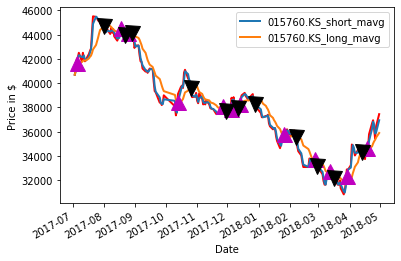

In [233]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Price in $')

daily_close['015760.KS'].plot(ax=ax1, color='r', lw=2.)

signals[['015760.KS_short_mavg', '015760.KS_long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals.loc[signals["015760.KS_positions"]==1.0].index, 
        signals["015760.KS_short_mavg"][signals["015760.KS_positions"] == 1.0],
        '^', markersize=15, color='m')
ax1.plot(signals.loc[signals["015760.KS_positions"]==-1.0].index, 
        signals["015760.KS_short_mavg"][signals["015760.KS_positions"]==-1.0],
        'v', markersize=15, color='k')

plt.show()

In [234]:
initial_capital = float(1000000.0)

positions = pd.DataFrame(index=signals.index).fillna(0.0)
portfolio = pd.DataFrame()

for ticker in tickers:
    positions[ticker] = 100*signals["{}_signal".format(ticker)]
    portfolio[ticker] = positions[ticker].multiply(daily_close[ticker], axis=0)
    
pos_diff = positions.diff()
portfolio["holdings"] = portfolio.sum(axis=1)
portfolio["cash"] = initial_capital - pos_diff.multiply(daily_close, 
                                                        axis=0).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

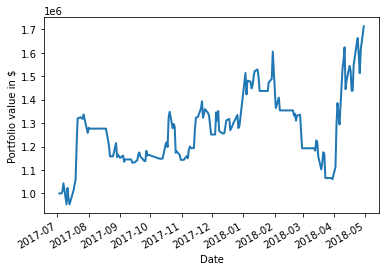

In [235]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

portfolio['total'].plot(ax=ax1, lw=2.)

plt.show()

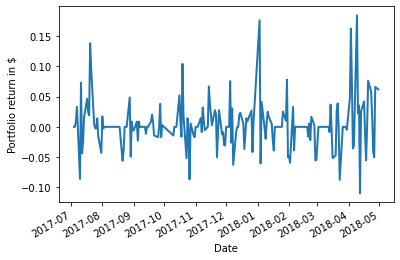

In [236]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio return in $')

portfolio['returns'].plot(ax=ax1, lw=2.)

plt.show()

In [237]:
returns = portfolio['returns']
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

print(sharpe_ratio)

1.3952222619766885
